In [1]:
from sklearn import datasets
import numpy as np, pandas as pd, matplotlib.pyplot as plt

In [2]:
datasets.load_iris().keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
#feature_names:
# ['sepal length (cm)',
#  'sepal width (cm)',
#  'petal length (cm)',
#  'petal width (cm)']

def init():
    Iris=datasets.load_iris()
    #Creating a dataframe with petal length and petal width
    df=pd.DataFrame({'x':Iris.data[:,2],'y':Iris.data[:,3],'cluster':Iris.target})
    print(df)
    return df

In [4]:
df=init()

       x    y  cluster
0    1.4  0.2        0
1    1.4  0.2        0
2    1.3  0.2        0
3    1.5  0.2        0
4    1.4  0.2        0
..   ...  ...      ...
145  5.2  2.3        2
146  5.0  1.9        2
147  5.2  2.0        2
148  5.4  2.3        2
149  5.1  1.8        2

[150 rows x 3 columns]


In [5]:
def get_k_clusters(df,k):
    centroids={}
    for i in range(k):
        coordinates=[]
        coordinates.append(df[df['cluster']==i]['x'].mean()) #x coordinate
        coordinates.append(df[df['cluster']==i]['y'].mean()) #y coordinate
        centroids[i]=coordinates
    return centroids    

In [6]:

#We are selecting only those records/instances which are classified as target/cluster '0' and we only take the 'x' column and find it's mean
df[df['cluster']==0]['x'].mean()
#this gives the mean of the 'x' column which belongs to the target '0'

1.4620000000000002

In [7]:
df.shape

(150, 3)

In [8]:
centroids=get_k_clusters(df,3)  #cuz we have 3 classes to cluster
print(centroids)

{0: [1.4620000000000002, 0.24599999999999997], 1: [4.26, 1.3259999999999998], 2: [5.5520000000000005, 2.0260000000000002]}


In [9]:
def assignment(df,centroids):
    for k,v in centroids.items():
        print(k,v)
        df['Distance from cluster {}'.format(k)]=np.sqrt(((df['x']-v[0])**2) +((df['y']-v[1])**2))
        
#     print(df)
    #assigning the closest cluster w.r.t to distance measured
    df['closest cluster']=df.iloc[:,[3,4,5]].idxmin(axis=1) 
    df['closest cluster']=df['closest cluster'].map(lambda x : int(x.lstrip("Distance from cluster")))
    
    #alloting color for each cluster for visulaization
    color_map={0:'r',1:'g',2:'b'}
    df['color']=df['closest cluster'].map(lambda x: color_map[x])
    
    return df

In [10]:
data=assignment(df,centroids)

0 [1.4620000000000002, 0.24599999999999997]
1 [4.26, 1.3259999999999998]
2 [5.5520000000000005, 2.0260000000000002]


In [11]:
# df[['x','y']]-[1.4620000000000002, 0.24599999999999997]

In [12]:
data.iloc[:,[3,4,5]].idxmin(axis=1)     #returns the name of the column which has the lowest value.

0      Distance from cluster 0
1      Distance from cluster 0
2      Distance from cluster 0
3      Distance from cluster 0
4      Distance from cluster 0
                ...           
145    Distance from cluster 2
146    Distance from cluster 2
147    Distance from cluster 2
148    Distance from cluster 2
149    Distance from cluster 2
Length: 150, dtype: object

In [13]:
"sfdet".strip("my name is amal")

'fdet'

In [14]:
pd.Series([1,2,3,4,5]).map(lambda x:x**2)

0     1
1     4
2     9
3    16
4    25
dtype: int64

In [15]:
data

,x,y,cluster,Distance from cluster 0,Distance from cluster 1,Distance from cluster 2,closest cluster,color
0,1.4,0.2,0,0.077201,3.073675,4.535789,0,r
1,1.4,0.2,0,0.077201,3.073675,4.535789,0,r
2,1.3,0.2,0,0.168404,3.166935,4.627503,0,r
3,1.5,0.2,0,0.059666,2.980852,4.444432,0,r
4,1.4,0.2,0,0.077201,3.073675,4.535789,0,r
...,...,...,...,...,...,...,...,...
145,5.2,2.3,2,4.265157,1.353616,0.446072,2,b
146,5.0,1.9,2,3.905529,0.936523,0.566198,2,b
147,5.2,2.0,2,4.129063,1.156666,0.352959,2,b
148,5.4,2.3,2,4.441482,1.499425,0.313337,2,b


In [42]:
def visualize(df,centroids,alpha1=0.4):  
    color_map={0:'r',1:'g',2:'b'}
    plt.scatter(df['x'],df['y'],c=df['color'],alpha=alpha1)
    for i in centroids.keys():
              plt.scatter(centroids[i][0],centroids[i][1],c=color_map[i],edgecolors='black')
#Centroids:
# {0: [1.4620000000000002, 0.24599999999999997],
#  1: [4.26, 1.3259999999999998],
#  2: [5.5520000000000005, 2.0260000000000002]}
    
    plt.xlabel("petal length")
    plt.ylabel("petal width")

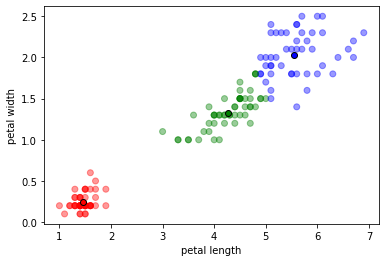

In [43]:
visualize(data,centroids)

In [28]:
centroids

{0: [1.4620000000000002, 0.24599999999999997],
 1: [4.26, 1.3259999999999998],
 2: [5.5520000000000005, 2.0260000000000002]}

In [44]:
# to find the centroids w.r.t the closest cluster
def upgrade_centroids(df,centroids):
    for i in centroids.keys():
        centroids[i][0]=df[df['closest cluster']==i]['x'].mean()
        centroids[i][1]=df[df['closest cluster']==i]['y'].mean()
    return centroids    

In [45]:
cent=upgrade_centroids(data,centroids)

In [46]:
cent

{0: [1.4620000000000002, 0.24599999999999997],
 1: [4.26923076923077, 1.3423076923076922],
 2: [5.595833333333334, 2.0375]}

In [52]:
(data['cluster']==data['closest cluster']).sum()/len(data['cluster'])    #four cluster's are different

0.96

{0: [1.4620000000000002, 0.24599999999999997], 1: [4.26923076923077, 1.3423076923076922], 2: [5.595833333333334, 2.0375]}
{0: [1.4620000000000002, 0.24599999999999997], 1: [4.26923076923077, 1.3423076923076922], 2: [5.595833333333334, 2.0375]}
0 [1.4620000000000002, 0.24599999999999997]
1 [4.26923076923077, 1.3423076923076922]
2 [5.595833333333334, 2.0375]
After clustering


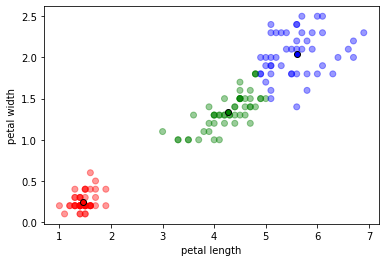

In [63]:
# iterate will we get the final k clusters (i.r cluster==closest cluster)
print(centroids)
while(1):
    closest_cluster_copy=data['closest cluster'].copy()
    
    centroids=upgrade_centroids(data,centroids)
    print(centroids)
    data=assignment(data,centroids)
#     visualize(data,centroids)
    if(data['closest cluster'].equals(closest_cluster_copy)):
        break
    
print("After clustering")
visualize(data,centroids)

In [58]:
p=data['x'].copy()

In [59]:
p

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: x, Length: 150, dtype: float64

In [55]:
df

,x,y,cluster,Distance from cluster 0,Distance from cluster 1,Distance from cluster 2,closest cluster,color
0,1.4,0.2,0,0.077201,3.073675,4.535789,0,r
1,1.4,0.2,0,0.077201,3.073675,4.535789,0,r
2,1.3,0.2,0,0.168404,3.166935,4.627503,0,r
3,1.5,0.2,0,0.059666,2.980852,4.444432,0,r
4,1.4,0.2,0,0.077201,3.073675,4.535789,0,r
...,...,...,...,...,...,...,...,...
145,5.2,2.3,2,4.265157,1.353616,0.446072,2,b
146,5.0,1.9,2,3.905529,0.936523,0.566198,2,b
147,5.2,2.0,2,4.129063,1.156666,0.352959,2,b
148,5.4,2.3,2,4.441482,1.499425,0.313337,2,b
